# LIANA tumor vs normal core atlas v1

## 00. Libraries

In [1]:
import liana as li

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

#import plotnine as p9

#import liana as li
import decoupler as dc
#import omnipath as op

# Import DESeq2
#from pydeseq2.dds import DeseqDataSet
#from pydeseq2.ds import DeseqStats

/home/kvalem/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [4]:
# Import DESeq2
#from pydeseq2.dds import DeseqDataSet
#from pydeseq2.ds import DeseqStats

In [5]:
adata = sc.read_h5ad(
    "/data/projects/2022/CRCA/results/v1/downstream_analyses/Prepare_de_analysis/artifacts/paired_tumor_normal-adata.h5ad"
)

In [6]:
adata

AnnData object with n_obs × n_vars = 2332515 × 28476
    obs: 'dataset', 'medical_condition', 'cancer_type', 'sample_id', 'sample_type', 'tumor_source', 'replicate', 'sample_tissue', 'anatomic_region', 'anatomic_location', 'tumor_stage', 'tumor_stage_TNM', 'tumor_stage_TNM_T', 'tumor_stage_TNM_N', 'tumor_stage_TNM_M', 'tumor_size', 'tumor_dimensions', 'tumor_grade', 'histological_type', 'microsatellite_status', 'mismatch_repair_deficiency_status', 'MLH1_promoter_methylation_status', 'MLH1_status', 'KRAS_status', 'BRAF_status', 'APC_status', 'TP53_status', 'PIK3CA_status', 'SMAD4_status', 'NRAS_status', 'MSH6_status', 'FBXW7_status', 'NOTCH1_status', 'MSH2_status', 'PMS2_status', 'POLE_status', 'ERBB2_status', 'STK11_status', 'HER2_status', 'CTNNB1_status', 'BRAS_status', 'patient_id', 'sex', 'age', 'ethnicity', 'treatment_status_before_resection', 'treatment_drug', 'treatment_response', 'RECIST', 'platform', 'platform_fine', 'cellranger_version', 'reference_genome', 'matrix_type', 'enr

In [4]:
sample_key = 'sample_id'
groupby = 'cell_type_fine'
condition_key = 'sample_type'

In [5]:
adata.obs['cell_type_fine'].replace({
    'Cancer BEST4': 'Cancer cell',
    'Cancer Colonocyte-like': 'Cancer cell',
    'Cancer Crypt-like': 'Cancer cell',
    'Cancer Goblet-like': 'Cancer cell',
    'Cancer TA-like': 'Cancer cell'
}, inplace=True)

In [6]:
adata.var

,var_names,ensembl,Geneid,GeneSymbol,Chromosome,Start,End,Class,Strand,Length,Version,Dataset_25pct_Overlap,n_cells,n_counts,n_cells_by_counts,mean_counts,total_counts,highly_variable
OR4F5,OR4F5,ENSG00000186092,ENSG00000186092.7,OR4F5,chr1,65419.0,71585.0,protein_coding,+,6166.0,gencode.v44,True,168,693,137,0.000107,690.0,False
ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009.6,ENSG00000238009,chr1,89295.0,133723.0,lncRNA,-,44428.0,gencode.v44,True,14782,23065,11021,0.002041,13184.0,False
OR4F29,OR4F29,ENSG00000284733,ENSG00000284733.2,OR4F29,chr1,450740.0,451678.0,protein_coding,-,938.0,gencode.v44,True,14,101,11,0.000015,98.0,False
ENSG00000278791,ENSG00000278791,ENSG00000278791,ENSG00000278791.1,ENSG00000278791,chr1,632325.0,632413.0,miRNA,-,88.0,gencode.v44,True,41004,236173,30119,0.035371,228456.0,False
OR4F16,OR4F16,ENSG00000284662,ENSG00000284662.2,OR4F16,chr1,685716.0,686654.0,protein_coding,-,938.0,gencode.v44,True,19,61,14,0.000009,55.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RNA5-8SN4,RNA5-8SN4,ENSG00000276700,ENSG00000276700.1,RNA5-8SN4,KI270733.1,128877.0,129029.0,rRNA,+,152.0,gencode.v44,True,263,910,147,0.000123,794.0,False
5_8S_rRNA-8,5_8S_rRNA-8,ENSG00000275757,ENSG00000275757.1,5_8S_rRNA,KI270733.1,173956.0,174108.0,rRNA,+,152.0,gencode.v44,True,424,1717,250,0.000239,1541.0,False
ENSG00000276017,ENSG00000276017,ENSG00000276017,ENSG00000276017.1,ENSG00000276017,KI270734.1,72411.0,74814.0,protein_coding,+,2403.0,gencode.v44,True,475,2348,429,0.001007,6502.0,False
ENSG00000278817,ENSG00000278817,ENSG00000278817,ENSG00000278817.1,ENSG00000278817,KI270734.1,131494.0,137392.0,protein_coding,+,5898.0,gencode.v44,True,28078,50742,21125,0.007658,49459.0,False


## 01. Pseudobulk

In [6]:
pdata = dc.get_pseudobulk(
    adata,
    sample_col=sample_key,
    groups_col=groupby,
    layer='counts',
    mode='sum',
    min_cells=10,
    min_counts=10000
)
pdata

AnnData object with n_obs × n_vars = 13122 × 28086
    obs: 'sample_id', 'cell_type_fine', 'dataset', 'medical_condition', 'sample_type', 'sample_tissue', 'treatment_status_before_resection', 'platform', 'platform_fine', 'tissue_cell_state', 'study_id', 'study_doi', 'study_pmid', 'SOLO_doublet_status', 'cell_type_middle', 'psbulk_n_cells', 'psbulk_counts'
    var: 'var_names', 'ensembl', 'Geneid', 'GeneSymbol', 'Chromosome', 'Start', 'End', 'Class', 'Strand', 'Length', 'Version', 'Dataset_25pct_Overlap', 'n_cells', 'n_counts', 'n_cells_by_counts', 'mean_counts', 'total_counts', 'highly_variable'
    layers: 'psbulk_props'

## 02. Subset the adata to remove the cell types that do ot have both tumor and normal 

In [7]:
# First, group the data by 'cell_type_fine' and check which cell types have both 'tumor' and 'normal'
valid_cell_types = []

# Iterate over unique cell types
for cell_type in adata.obs['cell_type_fine'].unique():
    # Subset the data for the current cell type
    subset = adata[adata.obs['cell_type_fine'] == cell_type]
    
    # Check if both 'tumor' and 'normal' are present
    if all(x in subset.obs['sample_type'].values for x in ['tumor', 'normal']):
        valid_cell_types.append(cell_type)

# Subset the AnnData object to keep only the valid cell types
adata_subset = adata[adata.obs['cell_type_fine'].isin(valid_cell_types)].copy()

## 03. PYDESEQ2

In [8]:
adata = adata_subset

In [ ]:
dea_results = {}
quiet = True

for cell_group in pdata.obs[groupby].unique():
    if cell_group == "Cancer cell":
        continue  # Skip the iteration if the group is "Cancer cell"
    try:
        # Select cell profiles
        ctdata = pdata[pdata.obs[groupby] == cell_group].copy()

        # Obtain genes that pass the edgeR-like thresholds
        # NOTE: QC thresholds might differ between cell types, consider applying them by cell type
        genes = dc.filter_by_expr(ctdata,
                                  group=condition_key,
                                  min_count=5, # a minimum number of counts in a number of samples
                                  min_total_count=10 # a minimum total number of reads across samples
                                  )

        # Filter by these genes
        ctdata = ctdata[:, genes].copy()

        # Build DESeq2 object
        # NOTE: this data is actually paired, so one could consider fitting the patient label as a confounder
        dds = DeseqDataSet(
            adata=ctdata,
            counts=pdata.X + 1,
            metadata=pdata.obs,
            design_factors="sample_type",
            ref_level=["sample_type", 'normal'], # set control as reference
            refit_cooks=True,
            quiet=quiet
        )

        # Compute LFCs
        dds.deseq2()
        # Contrast between stim and ctrl
        stat_res = DeseqStats(dds, contrast=["sample-type", 'tumor', 'normal'], quiet=quiet)
        stat_res.quiet = quiet
        # Compute Wald test
        stat_res.summary()
        # Shrink LFCs
        stat_res.lfc_shrink(coeff='sample-type_tumor_vs_normal') # {condition_key}_cond_vs_ref

        dea_results[cell_group] = stat_res.results_df

    except Exception as e:
        print(f"An error occurred for cell_type_fine '{cell_group}': {e}")
        continue


In [11]:
dea_results = {}
quiet = True

for cell_group in pdata.obs[groupby].unique():
    if cell_group == "Cancer cell":
        continue  # Skip the iteration if the group is "Cancer cell"
    try:
        # Select cell profiles
        ctdata = pdata[pdata.obs[groupby] == cell_group].copy()

        # Obtain genes that pass the edgeR-like thresholds
        genes = dc.filter_by_expr(
            ctdata,
            group=condition_key,
            min_count=5,  # minimum number of counts in a number of samples
            min_total_count=10  # minimum total number of reads across samples
        )

        # Filter by these genes
        ctdata = ctdata[:, genes].copy()

        # Build DESeq2 object
        dds = DeseqDataSet(
            adata=ctdata,
            counts=pdata.X + 1,
            metadata=pdata.obs,
            design_factors="sample_type",
            ref_level=["sample_type", 'normal'],  # set control as reference
            refit_cooks=True,
            quiet=quiet
        )

        # Compute LFCs
        dds.deseq2()

        # Contrast between stim and ctrl
        stat_res = DeseqStats(dds, contrast=["sample-type", 'tumor', 'normal'], quiet=quiet)
        stat_res.quiet = quiet
        stat_res.summary()  # Compute Wald test

        # Shrink LFCs
        stat_res.lfc_shrink(coeff='sample-type_tumor_vs_normal')

        # Add Ensembl column from adata.var to the results
        results_df = stat_res.results_df
        results_df = results_df.merge(
            adata.var[['ensembl']],
            left_index=True,
            right_index=True,
            how='left'
        )

        # Save the modified results
        dea_results[cell_group] = results_df

    except Exception as e:
        print(f"An error occurred for cell_type_fine '{cell_group}': {e}")
        continue


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      8.172174       -0.240452  0.085415 -3.281033  0.001034  0.008471
AAGAB     4.257151        0.067763  0.083610  1.100625  0.271060  0.448831
AAMP      8.308313        0.177345  0.066923  3.014978  0.002570  0.016940
AARSD1    5.255813        0.037429  0.120528  0.590012  0.555183  0.708950
AASDHPPT  7.109714       -0.067792  0.065667 -1.237528  0.215891  0.383138
...            ...             ...       ...       ...       ...       ...
ZSCAN18   5.470042        0.188298  0.083231  2.750933  0.005943  0.031173
ZSWIM7    7.166215       -0.057809  0.059374 -1.150425  0.249969  0.423235
ZYX       6.441458       -0.101440  0.096613 -1.478445  0.139289  0.285396
ZZEF1     5.671433        0.114519  0.095606  1.686735  0.091654  0.215961
ZZZ3      5.621692        0.064157  0.090537  1.013518  0.310813  0.490662

[5860 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AATF      4.422371        0.068862  0.082895  1.381008  0.167276  0.479144
ABCE1     4.270812       -0.058958  0.086126 -1.228552  0.219240  0.549756
ABCF1     6.341604        0.051202  0.112774  1.200250  0.230042  0.562991
ABHD14B  10.582260       -0.084219  0.097538 -1.587804  0.112331  0.386865
ABHD5     4.406902        0.213030  0.126285  2.599978  0.009323  0.100215
...            ...             ...       ...       ...       ...       ...
ZNF791    6.188325        0.016628  0.094240  0.411927  0.680393  0.854695
ZNF800    4.851704       -0.006174  0.079609 -0.144352  0.885223  0.955773
ZNHIT1    6.103112        0.028603  0.068005  0.652950  0.513788  0.775074
ZNHIT3    4.919834       -0.100702  0.088778 -1.837208  0.066179  0.290628
ZRANB2    8.848028        0.006406  0.072085  0.147778  0.882518  0.955773

[2490 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat        pvalue  \
AATF      5.133922        0.551817  0.092401  6.224473  4.831766e-10   
ABCE1     5.785789       -0.015693  0.082017 -0.205601  8.371025e-01   
ABCF1     9.352009        0.751086  0.148323  5.420125  5.955730e-08   
ABHD14B   7.678070        0.046511  0.106790  0.500177  6.169503e-01   
ABI1      8.648214        0.186887  0.091826  2.235771  2.536679e-02   
...            ...             ...       ...       ...           ...   
ZNF800    6.793127        0.097617  0.086875  1.227728  2.195491e-01   
ZNHIT1    7.107480       -0.127238  0.080270 -1.717219  8.593909e-02   
ZNHIT3    5.250811       -0.185304  0.091441 -2.219998  2.641887e-02   
ZPR1      4.887200        0.233489  0.097670  2.615033  8.921878e-03   
ZRANB2   12.146899        0.084948  0.084897  1.089451  2.759551e-01   

                 padj  
AATF     8.452533e-09  
ABCE1    8.796

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.09 seconds.

Fitting MAP dispersions...
... done in 0.08 seconds.

Fitting LFCs...
... done in 0.08 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG     18.912074       -0.298452  0.085338 -3.828224  0.000129  0.000750
AAAS      7.203147       -0.198535  0.082836 -2.557682  0.010537  0.030917
AACS      3.408503        0.044576  0.078475  0.635525  0.525086  0.651203
AAGAB    13.386804        0.099908  0.057737  1.834925  0.066517  0.137150
AAK1    112.740541       -0.011498  0.067875 -0.189627  0.849601  0.901449
...            ...             ...       ...       ...       ...       ...
ZXDC      6.825475       -0.105691  0.107134 -1.153240  0.248812  0.377647
ZYG11B    6.989677       -0.195547  0.087354 -2.541556  0.011036  0.032015
ZYX      35.123564        0.024513  0.083792 -0.394629  0.693116  0.787979
ZZEF1    18.203805        0.059906  0.069811  0.952200  0.340995  0.478116
ZZZ3     13.482415       -0.123997  0.074843 -1.847559  0.064666  0.134319

[8996 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.16 seconds.

Fitting MAP dispersions...
... done in 0.16 seconds.

Fitting LFCs...
... done in 0.18 seconds.

/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/utils.py:1260: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset))
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/utils.py:1260: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset))
/home/kvalem/.conda/envs/crc_atlas/lib/p

Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.388397   -6.795220e-08  0.003977  0.004161  0.996680  0.999814
A1BG-AS1   1.671060    1.227632e-06  0.005684  0.678800  0.497265  0.999814
AAAS       7.287233    1.375847e-06  0.004656  1.014839  0.310183  0.999814
AAGAB      9.461536   -4.448931e-06  0.004341 -1.245735  0.212862  0.999814
AAK1      41.794673    3.383926e-07  0.003966  0.132947  0.894235  0.999814
...             ...             ...       ...       ...       ...       ...
ZXDC       3.353393    2.202404e-06  0.004105 -0.316920  0.751304  0.999814
ZYG11B     2.988907   -1.318476e-06  0.003896 -0.818174  0.413258  0.999814
ZYX       38.683621    5.015568e-01  0.457120  2.020777  0.043303  0.999814
ZZEF1      6.779522   -2.108303e-06  0.003960 -0.910141  0.362748  0.999814
ZZZ3       4.888212    1.928182e-06  0.004721  1.075142  0.282311  0.999814

[8748 rows x 6

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.16 seconds.

Fitting MAP dispersions...
... done in 0.15 seconds.

Fitting LFCs...
... done in 0.17 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
           baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A1BG      35.054950       -0.540519  0.091248 -6.346097  2.208467e-10   
A1BG-AS1   6.438908       -0.565478  0.103225 -5.775693  7.663705e-09   
A2M-AS1    6.768685        0.274079  0.160292  4.070547  4.690297e-05   
AAAS      11.308161        0.021202  0.073657  0.245649  8.059540e-01   
AACS       5.577211       -0.028647  0.070404 -0.440806  6.593536e-01   
...             ...             ...       ...       ...           ...   
ZXDC      10.235602       -0.141648  0.098313 -1.554600  1.200414e-01   
ZYG11B     5.264838       -0.075124  0.094464 -0.882321  3.776033e-01   
ZYX       75.076832       -0.128055  0.076388 -2.206820  2.732666e-02   
ZZEF1     24.163883        0.126865  0.060278  2.172718  2.980158e-02   
ZZZ3      18.354690        0.003415  0.074547  0.043248  9.655035e-01   

                  padj  
A1BG      2.440780e-09  


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.05 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
           baseMean  log2FoldChange     lfcSE      stat        pvalue  \
AAK1      14.719973        0.016824  0.130734  0.276023  7.825308e-01   
AAMP       7.938447        0.015672  0.143271  0.239191  8.109574e-01   
AASDHPPT   6.436791        0.197086  0.144241  2.220504  2.638456e-02   
AATF       9.501479       -0.008209  0.152422 -0.148260  8.821378e-01   
ABCE1      6.108086       -0.003977  0.117131 -0.051599  9.588486e-01   
...             ...             ...       ...       ...           ...   
ZNRF1      4.839477        1.179181  0.259889  4.956025  7.194993e-07   
ZPR1       5.169996        0.035292  0.169277  0.656970  5.112005e-01   
ZRANB2    11.144494       -0.036269  0.110902 -0.646260  5.181111e-01   
ZWINT     20.417487       -0.141179  0.209368 -0.914850  3.602702e-01   
ZYX       18.997574        0.123960  0.161787  1.279333  2.007799e-01   

              padj  
AAK1      0.949219  
AAMP    

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


An error occurred for cell_type_fine 'Colonocyte': Factors should take at least two values, but sample-type takes the single value '['normal']'.


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


An error occurred for cell_type_fine 'Colonocyte BEST4': Factors should take at least two values, but sample-type takes the single value '['normal']'.


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


An error occurred for cell_type_fine 'Crypt cell': Factors should take at least two values, but sample-type takes the single value '['normal']'.


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.06 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG     5.814572        0.010009  0.424650  0.498786  0.617930  0.922269
A2M      1.758448       -0.033680  0.368639 -1.768424  0.076990  0.836987
A4GALT   0.475755        0.004415  1.032826  0.630490  0.528374  0.912371
AAGAB    1.926761        0.008574  0.475445  0.531352  0.595175  0.918652
AAK1     3.468810        0.022923  0.525950  1.429119  0.152970  0.836987
...           ...             ...       ...       ...       ...       ...
ZSWIM6   2.242262        0.011717  0.578363  0.983472  0.325375  0.860673
ZSWIM8   1.933159        0.027343  0.557019  1.778077  0.075391  0.836987
ZUP1     1.192439        0.028754  0.538658  1.615296  0.106247  0.836987
ZYX     15.519089       -0.021220  0.343532 -0.829582  0.406775  0.880848
ZZEF1    1.832408       -0.001018  0.473748 -0.062231  0.950379  0.989829

[6595 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG     3.505945       -0.026845  0.261569 -0.815365  0.414863       NaN
A2M     13.502455       -0.009054  0.265357 -0.320474  0.748609  0.971036
AAK1     4.124852        0.014512  0.272862  0.435509  0.663193       NaN
AAMP     6.966458        0.063180  0.235941  0.287478  0.773746  0.972787
AARS1    2.616985        0.068231  0.340662  1.912225  0.055847       NaN
...           ...             ...       ...       ...       ...       ...
ZRANB2   7.035224       -0.036032  0.255714 -0.986437  0.323919  0.859707
ZSWIM6   5.491049        0.018292  0.287866  0.614410  0.538945  0.935926
ZSWIM7   4.800183       -0.062162  0.252679 -1.403812  0.160375  0.726823
ZWINT    3.377977        2.759857  0.952260  3.205417  0.001349       NaN
ZYX     28.987791       -0.035359  0.237361 -0.898204  0.369077  0.879273

[5041 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A1BG      4.727998        0.285134  0.165151  1.945752  5.168452e-02   
A2M     533.482247       -0.037211  0.052981 -0.724620  4.686854e-01   
A4GALT   19.183469       -0.520808  0.063943 -8.248952  1.597897e-16   
AAAS      4.774809        0.102766  0.110153  0.998126  3.182182e-01   
AAGAB     6.644529        0.224025  0.083905  2.783045  5.385134e-03   
...            ...             ...       ...       ...           ...   
ZXDC      3.694182       -0.253926  0.140535 -2.057875  3.960210e-02   
ZYG11B   10.330597        0.195842  0.087640  2.359641  1.829261e-02   
ZYX      41.225366        0.431395  0.084638  5.279377  1.296237e-07   
ZZEF1     7.916509        0.087718  0.087243  1.061824  2.883154e-01   
ZZZ3      7.379787       -0.064957  0.102553 -0.684341  4.937601e-01   

                padj  
A1BG    8.478191e-02  
A2M     5.547331

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
           baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A2M      110.899048        0.740883  0.131493  5.882968  4.029740e-09   
A4GALT     8.561295       -0.513635  0.101853 -5.246160  1.553017e-07   
AAK1       6.839523        0.081287  0.128823  0.691135  4.894807e-01   
AAMDC     10.462650       -0.361448  0.104871 -3.624821  2.891616e-04   
AAMP       7.141123        0.048730  0.103174  0.499878  6.171613e-01   
...             ...             ...       ...       ...           ...   
ZNRD2      5.486407        0.050149  0.154567  0.365442  7.147812e-01   
ZRANB2    11.056421        0.245001  0.097313  2.644563  8.179656e-03   
ZSCAN18    5.237564       -0.252001  0.124847 -2.178608  2.936077e-02   
ZSWIM7     5.052681        0.074046  0.128562  0.624590  5.322399e-01   
ZYX        9.947995        0.620954  0.137886  4.759624  1.939541e-06   

                 padj  
A2M      4.150725e-08  
A4

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.02 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A2M     274.855896        0.297905  0.067382  4.557589  5.174425e-06   
A4GALT   13.092661       -0.400907  0.072755 -5.683924  1.316388e-08   
AAGAB     5.565861        0.229054  0.095006  2.597104  9.401355e-03   
AAK1     13.181665        0.027327  0.092688  0.315895  7.520823e-01   
AAMDC    16.501610       -0.011992  0.072263 -0.177045  8.594728e-01   
...            ...             ...       ...       ...           ...   
ZSWIM8    4.815718        0.332778  0.099837  3.528238  4.183362e-04   
ZYG11B    6.574330        0.060550  0.100676  0.659012  5.098881e-01   
ZYX      25.774185        0.468625  0.102184  4.794643  1.629644e-06   
ZZEF1     5.906853        0.237704  0.092900  2.714155  6.644502e-03   
ZZZ3      6.173944       -0.113830  0.110393 -1.151632  2.494724e-01   

                padj  
A2M     2.625332e-05  
A4GALT  1.061962

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1CF    13.885362       -0.279972  0.234852 -2.000198  0.045479  0.251679
AAK1    10.523955       -0.647106  0.432222 -2.752899  0.005907  0.080589
AAMP     7.830018       -0.413184  0.256146 -2.479277  0.013165  0.129715
ABCA5    9.829639        0.037512  0.182982  0.357654  0.720602  0.890454
ABCC3    6.225301       -0.006256  0.222030 -0.070077  0.944132  0.980831
...           ...             ...       ...       ...       ...       ...
ZNF703   7.578753       -0.047990  0.205780 -0.477676  0.632881  0.843421
ZNF706  20.026004        0.207887  0.220871  1.599855  0.109631  0.392513
ZNF91    7.175539        0.424094  0.319108  2.321713  0.020248  0.166283
ZNHIT1  14.962738       -0.135281  0.157047 -1.228875  0.219119  0.534426
ZRANB2  13.474982       -0.557966  0.274727 -2.961697  0.003059  0.056816

[2507 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AAK1    13.578011    3.135339e-06  0.001720  0.638784  0.522963  0.981460
AATF     6.615015    2.410132e-06  0.001783  0.508340  0.611215  0.981460
ABCA1   23.727218   -5.665007e-06  0.001562 -1.134848  0.256439  0.981460
ABCC1   15.287670   -2.901884e-06  0.001648 -0.531247  0.595248  0.981460
ABCF1   13.935821    2.877452e-07  0.001553  0.077723  0.938048  0.992665
...           ...             ...       ...       ...       ...       ...
ZRANB2  13.171114    1.891112e-07  0.001646  0.038368  0.969395  0.992665
ZSWIM6  86.573553   -2.082320e-06  0.001489 -0.513593  0.607537  0.981460
ZXDC     7.665270    5.161554e-07  0.001718  0.119046  0.905239  0.992665
ZYX     11.305612    1.908822e-06  0.001623  0.735271  0.462174  0.981460
ZZEF1    9.842398   -1.723570e-06  0.001638 -0.405032  0.685454  0.981460

[3282 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG     12.470807       -0.240528  0.126022 -2.225995  0.026015  0.063311
A2M     559.648196        0.088943  0.087653  0.778766  0.436117  0.560514
A4GALT   16.146060        0.039814  0.078417  0.550440  0.582017  0.690630
AAAS      4.994706       -0.143265  0.091894 -1.724618  0.084596  0.161437
AAGAB     5.547526        0.198544  0.105234  2.144891  0.031962  0.074438
...            ...             ...       ...       ...       ...       ...
ZSWIM8    4.859354        0.185074  0.105961  2.009367  0.044498  0.097403
ZYG11B    7.786642        0.002789  0.110820  0.028711  0.977095  0.985602
ZYX      18.181806        0.073919  0.100263  0.838072  0.401990  0.529588
ZZEF1     5.630205        0.000760  0.112160  0.002807  0.997760  0.998622
ZZZ3      6.809736       -0.420595  0.131822 -3.625180  0.000289  0.001515

[6952 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      9.074696       -0.259087  0.126640 -2.208440  0.027214  0.048271
A2M     240.620458       -0.087234  0.104465 -0.904604  0.365675  0.448156
A4GALT    9.644930        0.152009  0.102365  1.566723  0.117179  0.171750
AAAS      4.478472       -0.264712  0.097491 -2.834373  0.004592  0.009984
AAGAB     5.259862        0.329255  0.101892  3.403594  0.000665  0.001754
...            ...             ...       ...       ...       ...       ...
ZSWIM8    4.030988        0.265318  0.113288  2.520107  0.011732  0.023103
ZYG11B    7.379485        0.124558  0.101289  1.315215  0.188438  0.257354
ZYX      19.361380        0.156917  0.098599  1.669741  0.094971  0.143427
ZZEF1     4.551416        0.021459  0.117537  0.199769  0.841661  0.875318
ZZZ3      6.143583       -0.114849  0.117788 -1.057262  0.290392  0.369199

[7308 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A1BG     10.303706        0.856628  0.160975  5.684016  1.315681e-08   
A2M     301.730914       -0.263979  0.134324 -2.224559  2.611084e-02   
A4GALT   29.877574       -0.498848  0.069652 -7.288272  3.139559e-13   
AAAS      8.048566       -0.215810  0.073943 -2.964297  3.033757e-03   
AACS      4.628492       -0.274662  0.101328 -2.808135  4.982934e-03   
...            ...             ...       ...       ...           ...   
ZSWIM8    8.258283        0.251858  0.080807  3.203103  1.359555e-03   
ZYG11B   12.825996       -0.313487  0.096696 -3.352014  8.022596e-04   
ZYX      41.920570        0.128778  0.082417  1.600343  1.095225e-01   
ZZEF1     7.285529       -0.083051  0.094478 -0.911835  3.618556e-01   
ZZZ3      9.348674       -0.377499  0.097951 -3.993265  6.516964e-05   

                padj  
A1BG    5.183529e-08  
A2M     4.097149

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.06 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.06 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AAMP          8.623638       -0.095075  0.099023 -1.182300  0.237087  0.383156
AASDHPPT      5.806423       -0.142478  0.096753 -1.763366  0.077839  0.171575
AATF          8.736707        0.202687  0.107052  2.325132  0.020065  0.062960
ABCE1         7.330235       -0.006090  0.101649 -0.061595  0.950885  0.976488
ABCF1        14.560121        0.440021  0.129520  3.944650  0.000080  0.000910
...                ...             ...       ...       ...       ...       ...
ZPR1          5.584587       -0.039637  0.093797 -0.500374  0.616812  0.740216
ZRANB2       16.488141        0.124636  0.105205  1.500791  0.133410  0.255306
ZSCAN16-AS1   6.274674        0.112866  0.119562  1.301956  0.192932  0.332508
ZWINT        14.298085       -0.005196  0.116440 -0.044325  0.964645  0.981894
ZYX           7.239029       -0.148470  0.116823 -1.644099

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


An error occurred for cell_type_fine 'Goblet': Factors should take at least two values, but sample-type takes the single value '['normal']'.


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AAK1    13.504754   -3.680915e-07  0.002027 -0.242383  0.808483  0.999413
ABCA13  51.808312   -1.248825e-06  0.001901 -0.542270  0.587633  0.999413
ABCC3    6.041707    3.945699e-08  0.001966  0.114380  0.908936  0.999413
ABHD2   15.001531    1.478547e-07  0.002248  0.087013  0.930661  0.999413
ABHD5   21.834001   -4.354762e-07  0.001845 -0.294523  0.768358  0.999413
...           ...             ...       ...       ...       ...       ...
ZSWIM6  13.160770   -3.336554e-07  0.001990 -0.317520  0.750849  0.999413
ZXDC     9.887736   -2.264129e-07  0.002184 -0.159893  0.872965  0.999413
ZYG11B   4.795240   -4.423658e-07  0.002121 -0.444028  0.657022  0.999413
ZYX     46.064838   -8.840263e-07  0.002017 -0.361525  0.717707  0.999413
ZZEF1    6.508702    7.308319e-07  0.002407  0.742111  0.458020  0.999413

[2817 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AAK1       7.947280        0.209770  0.278616  2.077910  0.037718  0.202153
ABRACL     9.239800       -0.155961  0.210625 -1.653913  0.098145  0.290939
ACAP1      7.931187        0.267163  0.260400  2.224187  0.026136  0.187314
ACAP2      5.127481       -0.049176  0.149497 -0.618823  0.536033       NaN
ACTB     185.008973       -0.130169  0.214036 -1.526840  0.126801  0.320562
...             ...             ...       ...       ...       ...       ...
ZFP36L2   61.343073       -0.044419  0.158598 -0.568857  0.569453  0.701484
ZNF207     6.235602        0.133509  0.178703  1.459677  0.144379       NaN
ZNF292     5.556768        0.073143  0.192366  0.990282  0.322037       NaN
ZNF331    33.209263       -0.186905  0.184937 -1.807581  0.070672  0.268028
ZRANB2     4.998764        0.046520  0.157087  0.590010  0.555184       NaN

[1186 rows x 6

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.06 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A1BG     14.994754       -0.320352  0.115824 -3.026911  2.470671e-03   
A2M     162.670056       -0.549368  0.108388 -5.582976  2.364372e-08   
AAAS      5.726671       -0.097979  0.093025 -1.129892  2.585217e-01   
AAGAB     5.933727       -0.038787  0.090556 -0.461143  6.446958e-01   
AAK1     27.751536       -0.219371  0.087981 -2.715557  6.616437e-03   
...            ...             ...       ...       ...           ...   
ZXDC      4.823121       -0.215989  0.132080 -1.844383  6.512739e-02   
ZYG11B    9.981017       -0.284261  0.100800 -3.036740  2.391520e-03   
ZYX      63.534197        0.002582  0.078634 -0.148683  8.818035e-01   
ZZEF1    11.626061       -0.596253  0.101233 -6.156383  7.442515e-10   
ZZZ3      6.208882       -0.272630  0.114088 -2.617271  8.863599e-03   

                padj  
A1BG    6.330725e-03  
A2M     1.937748

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


An error occurred for cell_type_fine 'Macrophage cycling': Factors should take at least two values, but sample-type takes the single value '['tumor']'.


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      5.493607       -0.094325  0.129590 -0.946309  0.343991  0.495857
AAK1      4.955339        0.091579  0.114788  0.992669  0.320871  0.472197
AAMP      5.162106        0.120355  0.104650  1.346466  0.178152  0.310104
AASDHPPT  3.779432       -0.084944  0.095226 -1.041542  0.297624  0.448238
AATF      4.049358        0.170585  0.110729  1.823282  0.068261  0.150053
...            ...             ...       ...       ...       ...       ...
ZNRF1     8.025261        0.017214  0.129959  0.175266  0.860870  0.911424
ZPR1      3.866462        0.146178  0.099340  1.679304  0.093093  0.190239
ZRANB2    9.588264       -0.289455  0.084608 -3.687298  0.000227  0.001405
ZSWIM7    4.490921       -0.064201  0.087718 -0.829692  0.406713  0.555583
ZYX       3.669943        0.086290  0.133842  0.838763  0.401603  0.550820

[3732 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.195046        0.080780  0.155018  0.673426  0.500676  0.628416
A2M        3.005521        0.018101  0.240731  0.058718  0.953176  0.969586
AAK1       8.783616       -0.219811  0.127317 -2.002355  0.045247  0.104731
AAMP       6.495410       -0.122325  0.112172 -1.235657  0.216586  0.345980
AASDHPPT   3.688067       -0.049593  0.121394 -0.482408  0.629516  0.735210
...             ...             ...       ...       ...       ...       ...
ZSWIM6    20.311732       -0.104569  0.184226 -0.788372  0.430479  0.566631
ZSWIM7     7.403622       -0.135121  0.102302 -1.484234  0.137747  0.247136
ZSWIM8     3.155062        0.570301  0.164947  3.788504  0.000152  0.000945
ZYX       29.855145       -0.194365  0.100084 -2.167281  0.030213  0.076057
ZZEF1      3.765083       -0.337860  0.136901 -2.784084  0.005368  0.018574

[5377 rows x 6

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG     4.706366        0.684440  0.320805  2.800295  0.005106  0.028571
A2M      4.354978        0.430882  0.393189  1.980020  0.047701  0.144716
AAGAB    2.157305       -0.055941  0.259294 -0.361490  0.717733  0.838672
AAK1     7.435192       -0.176218  0.211552 -1.124066  0.260985  0.455944
AAMDC    2.561619       -0.175111  0.264688 -1.084643  0.278080  0.474498
...           ...             ...       ...       ...       ...       ...
ZSWIM8   2.522681        0.185916  0.253191  1.120423  0.262534  0.457513
ZXDC     1.493560       -0.817850  0.368316 -2.834876  0.004584  0.026280
ZYG11B   2.952893       -0.149288  0.246911 -0.923023  0.355995  0.555035
ZYX     28.430120       -0.575793  0.177477 -3.601291  0.000317  0.003266
ZZEF1    3.030284       -0.785099  0.215824 -3.990215  0.000066  0.000905

[6581 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


An error occurred for cell_type_fine 'Myeloid progenitor': Factors should take at least two values, but sample-type takes the single value '['tumor']'.


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AAK1     8.186501        0.071938  0.127498  0.801856  0.422636  0.603419
ABCF1    5.161531        0.164721  0.163933  1.553572  0.120286  0.254142
ABHD17A  6.363873       -0.038556  0.131357 -0.436564  0.662428  0.790909
ABI3     4.788717        0.171978  0.125376  1.807052  0.070754  0.180309
ABLIM1   5.269905        0.092783  0.146711  0.968275  0.332907  0.523376
...           ...             ...       ...       ...       ...       ...
ZNF638   4.004536        0.152350  0.140245  1.535116  0.124755  0.261077
ZNF644   4.116509       -0.032250  0.114611 -0.378241  0.705251  0.822751
ZNF706   4.780971        0.069041  0.100167  0.861353  0.389044  0.578531
ZNHIT1   4.908452        0.061551  0.094284  0.795629  0.426248  0.605351
ZRANB2   5.197949        0.054445  0.120435  0.620911  0.534658  0.697189

[1896 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/utils.py:1260: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset))
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/utils.py:1260: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset))
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/utils.py:1260: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta 

Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AAK1      42.894107    2.035835e-07  0.002187  0.246097  0.805607  0.999876
AAMP      50.600745   -7.167830e-07  0.001553 -0.912947       NaN       NaN
AASDHPPT  17.564965    1.826434e-06  0.002336  1.288435  0.197595  0.999876
AATF      15.929510    2.282501e-07  0.003352  0.783431  0.433374  0.999876
ABCC1     18.921308    2.100010e-07  0.002134  0.220542  0.825449  0.999876
...             ...             ...       ...       ...       ...       ...
ZSWIM6    13.819520   -9.728824e-08  0.001832 -0.208216  0.835061  0.999876
ZXDC      12.116321   -8.492784e-07  0.001667 -0.812860  0.416298  0.999876
ZYX       65.009677   -6.975845e-07  0.001761 -0.589074  0.555811  0.999876
ZZEF1     13.034175    2.165838e-07  0.002009  0.202249  0.839722  0.999876
ZZZ3      12.615079   -1.121257e-06  0.001587 -1.225809  0.220271  0.999876

[4692 rows x 6

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1   12.642081       -0.151348  0.226982 -0.738587  4.601576e-01   
ABCG1    6.507209        0.017273  0.276585  0.074029  9.409870e-01   
ABHD2   11.437892       -1.535333  0.288035 -5.503980  3.713127e-08   
ABHD3    4.665478       -0.945052  0.359893 -2.907008  3.649042e-03   
ABHD5   37.256474       -0.231904  0.229507 -1.129067  2.588696e-01   
...           ...             ...       ...       ...           ...   
ZNF638   4.750012       -0.714140  0.263766 -2.970906  2.969230e-03   
ZNF710   3.520935       -0.501472  0.428517 -1.523504  1.276325e-01   
ZNFX1    7.547806       -0.388155  0.256353 -1.725937  8.435880e-02   
ZSWIM6  22.294261       -0.808165  0.403669 -2.450276  1.427469e-02   
ZYX     17.689681       -0.830162  0.237571 -3.695312  2.196167e-04   

                padj  
ABCA1   5.329830e-01  
ABCG1   9.533509e-01  
ABHD2

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.04 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG     14.567532        0.045944  0.108269  0.477655  0.632895  0.700476
A2M     364.469442       -0.100502  0.076473 -1.449331  0.147245  0.205501
A4GALT   15.979970       -0.019476  0.065097 -0.306317  0.759364  0.808150
AAAS      5.789184        0.013583  0.077679  0.180171  0.857018  0.887504
AAGAB     4.608907        0.203432  0.094009  2.248151  0.024567  0.043655
...            ...             ...       ...       ...       ...       ...
ZSWIM8    5.791790        0.416224  0.091736  4.751808  0.000002  0.000008
ZYG11B    9.346498        0.076153  0.098476  0.832725  0.405000  0.485783
ZYX      31.938107        0.266746  0.081214  3.368052  0.000757  0.001929
ZZEF1     5.739927        0.147465  0.099839  1.586807  0.112556  0.162749
ZZZ3      6.305443        0.011148  0.101999  0.117653  0.906342  0.927270

[8064 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.11 seconds.

Fitting MAP dispersions...
... done in 0.11 seconds.

Fitting LFCs...
... done in 0.12 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
           baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A1BG      89.031277       -0.033104  0.096629 -0.526317  5.986680e-01   
A1BG-AS1   4.350478        0.173414  0.100796  1.908716  5.629871e-02   
AAAS      16.848260        0.111936  0.063440  1.809894  7.031224e-02   
AACS       9.154237        0.631508  0.089490  7.240607  4.466815e-13   
AAGAB      9.165521        0.380843  0.070872  5.529928  3.203615e-08   
...             ...             ...       ...       ...           ...   
ZXDC       5.371922        0.328811  0.116473  3.150888  1.627749e-03   
ZYG11B     7.101936        0.296569  0.087674  3.585351  3.366254e-04   
ZYX        8.262396        0.036460  0.103099  0.414751  6.783245e-01   
ZZEF1     15.564042        0.604675  0.088187  7.069413  1.555910e-12   
ZZZ3       9.795421        0.164603  0.081277  2.154321  3.121498e-02   

                  padj  
A1BG      6.540742e-01  


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.11 seconds.

Fitting MAP dispersions...
... done in 0.10 seconds.

Fitting LFCs...
... done in 0.21 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
           baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A1BG      30.688369        0.551376  0.160569  3.680588  2.326969e-04   
A1BG-AS1   1.756514        0.430548  0.263111  1.578843  1.143720e-01   
A2M        2.323748       -0.029397  0.324185 -0.302549  7.622337e-01   
AAAS       7.248111       -0.292048  0.136059 -2.247494  2.460844e-02   
AACS       4.454754       -0.173182  0.166761 -1.108606  2.676002e-01   
...             ...             ...       ...       ...           ...   
ZXDC       1.783204       -0.088906  0.238319 -0.524474  5.999489e-01   
ZYG11B     2.949685        0.249252  0.202805  1.308614  1.906653e-01   
ZYX        4.467393       -1.274265  0.193662 -6.773930  1.253303e-11   
ZZEF1      7.036274       -0.157551  0.159315 -1.068904  2.851128e-01   
ZZZ3       4.016674       -0.137097  0.161884 -0.927058  3.538962e-01   

                  padj  
A1BG      7.027327e-04  


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/utils.py:1260: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset))


Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
        baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AARS1   3.309491    6.052048e-07  0.003281  0.573212  0.566501  0.948085
ACADVL  7.547535    1.313431e-06  0.003353  0.945939  0.344180  0.912756
ACBD3   3.892531    1.469197e-06  0.004301  1.664183  0.096076  0.883740
ACSL4   1.009554    4.534658e-07  0.005714  0.996464  0.319025  0.905520
ACSS1   3.142671    5.734540e-08  0.002985  0.076353  0.939138  0.988960
...          ...             ...       ...       ...       ...       ...
ZNF638  2.257664    5.532877e-07  0.003846  0.902613  0.366731  0.914009
ZNF644  1.705228   -6.404788e-07  0.002348 -0.731791  0.464296  0.920074
ZNF706  2.920887   -8.278682e-07  0.002524 -0.734224  0.462812  0.920074
ZNF791  4.792167    1.725968e-07  0.003016  0.144976  0.884729  0.982001
ZRANB2  3.339532    3.303910e-07  0.003155  0.311508  0.755414  0.963665

[1588 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE       stat        pvalue  \
A1BG    13.862131       -2.158514  0.216756 -10.111576  4.908806e-24   
AAAS     5.017927        0.526949  0.137400   3.937291  8.240665e-05   
AAK1     5.199948        1.004478  0.186084   5.598034  2.167957e-08   
AAMP    11.907728        0.394806  0.108502   3.700694  2.150105e-04   
AARS1   17.093229        0.383376  0.096403   4.057406  4.962080e-05   
...           ...             ...       ...        ...           ...   
ZNRD2   15.712059        0.707307  0.190976   3.871051  1.083671e-04   
ZPR1     6.262552        0.127794  0.131695   0.985589  3.243349e-01   
ZRANB2  22.976509        0.226816  0.086747   2.642834  8.221537e-03   
ZSWIM7   4.472502       -0.514923  0.163469  -3.306548  9.445301e-04   
ZWINT   10.008801        4.815322  0.268502  17.370294  1.385137e-67   

                padj  
A1BG    6.002735e-23  
AAAS    1.693385

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      5.442873       -0.108280  0.158139 -1.041097  0.297831  0.477263
A2M      42.130318        0.605251  0.219852  3.396685  0.000682  0.006403
AAK1      5.678540        0.107434  0.169226  1.034864  0.300732  0.479670
AAMDC    10.000531       -0.393325  0.094711 -4.509050  0.000007  0.000156
AAMP      8.239663        0.058330  0.083439  0.792310  0.428180  0.602240
...            ...             ...       ...       ...       ...       ...
ZRANB2   15.977159        0.054138  0.107791  0.624459  0.532326  0.685459
ZSCAN18   6.839507       -0.092974  0.133840 -0.957058  0.338538  0.520583
ZSWIM6   14.086677       -0.231998  0.214081 -1.830740  0.067139  0.172969
ZSWIM7    5.316075       -0.132401  0.100436 -1.564719  0.117649  0.253237
ZYX       5.684232        0.350628  0.193285  2.546644  0.010876  0.048171

[3769 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


An error occurred for cell_type_fine 'TA progenitor': Factors should take at least two values, but sample-type takes the single value '['normal']'.


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.08 seconds.

Fitting MAP dispersions...
... done in 0.09 seconds.

Fitting LFCs...
... done in 0.08 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG     7.104338        0.046628  0.169101  0.252445  0.800697  0.891474
AAAS     3.867547       -0.364916  0.151992 -2.609014  0.009080  0.045856
AAGAB    6.815375       -0.042790  0.128443 -0.449006  0.653428  0.796301
AAK1    41.108175        0.231204  0.137658  2.124594  0.033621  0.115835
AAMDC    3.012785        0.314487  0.227812  2.120009  0.034005  0.116550
...           ...             ...       ...       ...       ...       ...
ZXDC     2.445605       -0.010231  0.246305 -0.113245  0.909836  0.954009
ZYG11B   2.737022       -0.067839  0.210184 -0.631231  0.527889  0.708145
ZYX     14.514337       -0.314676  0.147638 -2.412640  0.015837  0.068181
ZZEF1    7.759580       -0.029491  0.164128 -0.280123  0.779383  0.878827
ZZZ3     4.727464        0.027003  0.169259  0.272114  0.785534  0.882481

[7883 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AAK1     3.449649        0.243512  0.179073  1.748264  0.080418  0.221419
ABCA5    5.294256        0.204211  0.158472  1.599677  0.109670  0.272007
ABCB9    3.801372       -0.189547  0.199455 -1.352236  0.176300  0.368801
ABCC3    7.063060       -0.157128  0.179597 -1.174437  0.240220  0.448049
ABCC5    4.866115       -0.114881  0.173134 -0.882032  0.377759  0.578444
...           ...             ...       ...       ...       ...       ...
ZNF91    5.988423        0.090500  0.173241  0.687608  0.491700  0.683087
ZNHIT1   9.706779       -0.030312  0.199600 -0.229901  0.818169  0.902343
ZRANB2  13.226670        0.015638  0.130310  0.141555  0.887431  0.940456
ZSWIM6   7.196944        0.174500  0.290498  1.203398  0.228822  0.436650
ZZEF1    3.923914       -0.432429  0.228743 -2.564351  0.010337  0.050580

[2891 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG          4.091153       -0.264027  0.298257 -1.229415  0.218916  0.353457
A2M           7.816970        0.383233  0.514748  1.597229  0.110215  0.213868
AAAS          3.048528        0.719613  0.255751  3.206403  0.001344  0.007219
AAK1          4.487281        0.766799  0.274572  3.230275  0.001237  0.006782
AAMP          6.078160        0.239242  0.160950  1.666703  0.095573  0.192368
...                ...             ...       ...       ...       ...       ...
ZSCAN16-AS1   4.007696       -0.210076  0.223874 -1.150158  0.250079  0.390757
ZSWIM6        5.692424        1.228444  0.412708  2.557576  0.010540  0.035864
ZSWIM7        4.616021       -0.406941  0.176175 -2.578803  0.009914  0.034123
ZYX          24.139167       -0.464218  0.168835 -2.992005  0.002772  0.012896
ZZEF1         3.457730        0.640391  0.288703  2.675219

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.309054       -0.301657  0.143193 -2.615458  0.008911  0.031899
A2M        8.047617       -0.176071  0.163655 -1.586789  0.112560  0.226802
AAK1       5.696616        0.071021  0.115555  0.799254  0.424143  0.582263
AAMP       8.638870       -0.215728  0.087230 -2.744107  0.006068  0.023971
AASDHPPT   4.362574       -0.023187  0.101712 -0.277679  0.781259  0.860314
...             ...             ...       ...       ...       ...       ...
ZPR1       6.000360        0.084061  0.087700  1.111524  0.266343  0.419547
ZRANB2     8.598529       -0.090836  0.084590 -1.234057  0.217182  0.363294
ZSWIM6     5.875530        0.472801  0.182511  3.216265  0.001299  0.007000
ZSWIM7     8.452768       -0.263710  0.090119 -3.247642  0.001164  0.006395
ZYX       26.440628       -0.182844  0.111569 -1.981114  0.047578  0.117893

[4754 rows x 6

/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AAK1     11.105324        0.440197  0.128012  4.058006  0.000049  0.000513
ABCB1     5.238756       -0.222155  0.115793 -2.367268  0.017920  0.054112
ABCF1     5.548944        0.243250  0.111351  2.610415  0.009043  0.032096
ABHD14B   4.134756       -0.169091  0.091335 -2.149154  0.031622  0.085172
ABHD17A   7.531628       -0.093121  0.111975 -1.112297  0.266010  0.414168
...            ...             ...       ...       ...       ...       ...
ZNF706    6.008040        0.094933  0.062185  1.667309  0.095453  0.196772
ZNF800    4.477452       -0.014264  0.083107 -0.196518  0.844205  0.901886
ZNHIT1    6.363489        0.125736  0.092717  1.649778  0.098988  0.202457
ZRANB2    7.209998        0.050435  0.098213  0.649736  0.515863  0.659575
ZYX       5.259766        0.052599  0.103333  0.646408  0.518015  0.661245

[1845 rows x 6 columns]


/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring counts.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: adata was provided; ignoring metadata.
  dds = DeseqDataSet(
/tmp/ipykernel_345334/2117491887.py:23: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(
Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.02 seconds.

/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/utils.py:1260: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset))
/home/kvalem/.conda/envs/crc_atlas/lib/python3.11/site-packages/pydeseq2/utils.py:1260: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset))
/home/kvalem/.conda/envs/crc_atlas/lib/p

Shrunk log2 fold change & Wald test p-value: sample-type tumor vs normal
             baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG         8.136955    1.892440e-06  0.004537  1.092184  0.274752  0.986707
AAK1         3.498247    7.815226e-07  0.003989  0.429085  0.667862  0.988641
AAMP         3.718020   -1.311103e-06  0.003815 -0.467744  0.639968  0.987130
AASDHPPT     3.301934   -5.204514e-06  0.003375 -1.921734  0.054639  0.986707
AATF         3.636061   -2.279202e-07  0.003889 -0.046249  0.963112  0.996975
...               ...             ...       ...       ...       ...       ...
ZRANB2       6.640029   -3.791063e-06  0.003616 -1.096647  0.272796  0.986707
ZSCAN16-AS1  3.016482    2.599470e-06  0.004516  1.500009  0.133612  0.986707
ZSWIM6       2.387651   -2.298039e-06  0.003244 -1.128722  0.259015  0.986707
ZSWIM7       2.514273   -9.633090e-07  0.003756 -0.416443  0.677086  0.990574
ZYX          6.109562   -8.637555e-06  0.002919 -2.717375  0.006580  

## 04. Concatenate results across cell types

In [16]:
dea_df = pd.concat(dea_results)
dea_df = dea_df.reset_index().rename(columns={'level_0': groupby,'level_1':'index'}).set_index('index')
dea_df.head()

,cell_type_fine,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ensembl
index,,,,,,,,
A1BG,B cell activated,8.172174,-0.240452,0.085415,-3.281033,0.001034,0.008471,ENSG00000121410
AAGAB,B cell activated,4.257151,0.067763,0.083610,1.100625,0.271060,0.448831,ENSG00000103591
AAMP,B cell activated,8.308313,0.177345,0.066923,3.014978,0.002570,0.016940,ENSG00000127837
AARSD1,B cell activated,5.255813,0.037429,0.120528,0.590012,0.555183,0.708950,ENSG00000266967
AASDHPPT,B cell activated,7.109714,-0.067792,0.065667,-1.237528,0.215891,0.383138,ENSG00000149313


## 0*. read concatenated deseq results from valentin

In [ ]:
#dea_df= pd.read_csv("combined_DESeq2_results.tsv",sep="\t")

In [ ]:
#dea_df = dea_df.rename(columns={"cell_type":"cell_type_fine"})

## 05. Save Differential Expression results

In [17]:
dea_df.to_csv("dea.csv")

In [7]:
dea_df = pd.read_csv("dea.csv")

In [4]:
dea_df = pd.read_csv("combined_DESeq2_results.tsv",sep="\t")

In [5]:
dea_df

,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,weight,comparison,cell_type
0,COL4A1,350.801173,2.420962,0.114288,21.182980,1.370808e-99,2.686775e-95,0.542298,tumor_vs_normal,Pericyte
1,SPARC,772.587665,1.751049,0.082878,21.128098,4.388731e-99,4.202095e-95,0.555054,tumor_vs_normal,Pericyte
2,COL4A2,288.448189,1.831955,0.087302,20.984143,9.155939e-98,5.981859e-94,0.542298,tumor_vs_normal,Pericyte
3,CYTOR,102.947437,2.524187,0.123917,20.370013,3.085937e-92,1.491521e-88,0.549781,tumor_vs_normal,Pericyte
4,COL18A1,219.802384,1.413092,0.074889,18.869076,2.048508e-79,5.816379e-76,0.748699,tumor_vs_normal,Pericyte
...,...,...,...,...,...,...,...,...,...,...
296939,FCGR2B,10.473368,0.000085,0.095667,0.000890,9.992899e-01,9.491277e-01,1.498430,tumor_vs_normal,B_cell_naive
296940,COMMD9,3.437405,-0.000117,0.140199,-0.000832,9.993365e-01,1.000000e+00,0.734389,tumor_vs_normal,B_cell_naive
296941,CREB3L2,4.089512,0.000086,0.142866,0.000605,9.995171e-01,1.000000e+00,0.927970,tumor_vs_normal,B_cell_naive
296942,SAP30BP,7.734365,0.000051,0.097512,0.000522,9.995835e-01,1.000000e+00,0.498537,tumor_vs_normal,B_cell_naive


In [6]:
dea_df["cell_type"] = dea_df["cell_type"].str.replace("_", " ")

In [14]:
dea_df = dea_df.rename(columns={"symbol":"gene_id"})

In [20]:
dea_df = dea_df.rename(columns={"cell_type":"cell_type_fine"})

In [15]:
dea_df

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,weight,comparison,cell_type
0,COL4A1,350.801173,2.420962,0.114288,21.182980,1.370808e-99,2.686775e-95,0.542298,tumor_vs_normal,Pericyte
1,SPARC,772.587665,1.751049,0.082878,21.128098,4.388731e-99,4.202095e-95,0.555054,tumor_vs_normal,Pericyte
2,COL4A2,288.448189,1.831955,0.087302,20.984143,9.155939e-98,5.981859e-94,0.542298,tumor_vs_normal,Pericyte
3,CYTOR,102.947437,2.524187,0.123917,20.370013,3.085937e-92,1.491521e-88,0.549781,tumor_vs_normal,Pericyte
4,COL18A1,219.802384,1.413092,0.074889,18.869076,2.048508e-79,5.816379e-76,0.748699,tumor_vs_normal,Pericyte
...,...,...,...,...,...,...,...,...,...,...
296939,FCGR2B,10.473368,0.000085,0.095667,0.000890,9.992899e-01,9.491277e-01,1.498430,tumor_vs_normal,B cell naive
296940,COMMD9,3.437405,-0.000117,0.140199,-0.000832,9.993365e-01,1.000000e+00,0.734389,tumor_vs_normal,B cell naive
296941,CREB3L2,4.089512,0.000086,0.142866,0.000605,9.995171e-01,1.000000e+00,0.927970,tumor_vs_normal,B cell naive
296942,SAP30BP,7.734365,0.000051,0.097512,0.000522,9.995835e-01,1.000000e+00,0.498537,tumor_vs_normal,B cell naive


In [10]:
dea_df.index = dea_df.ensembl


In [11]:
dea_df

,gene_id,cell_type_fine,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ensembl
ensembl,,,,,,,,,
ENSG00000121410,A1BG,B cell activated,8.172174,-2.404518e-01,0.085415,-3.281033,0.001034,0.008471,ENSG00000121410
ENSG00000103591,AAGAB,B cell activated,4.257151,6.776271e-02,0.083610,1.100625,0.271060,0.448831,ENSG00000103591
ENSG00000127837,AAMP,B cell activated,8.308313,1.773452e-01,0.066923,3.014978,0.002570,0.016940,ENSG00000127837
ENSG00000266967,AARSD1,B cell activated,5.255813,3.742906e-02,0.120528,0.590012,0.555183,0.708950,ENSG00000266967
ENSG00000149313,AASDHPPT,B cell activated,7.109714,-6.779158e-02,0.065667,-1.237528,0.215891,0.383138,ENSG00000149313
...,...,...,...,...,...,...,...,...,...
ENSG00000132485,ZRANB2,pDC,6.640029,-3.791063e-06,0.003616,-1.096647,0.272796,0.986707,ENSG00000132485
ENSG00000269293,ZSCAN16-AS1,pDC,3.016482,2.599470e-06,0.004516,1.500009,0.133612,0.986707,ENSG00000269293
ENSG00000130449,ZSWIM6,pDC,2.387651,-2.298039e-06,0.003244,-1.128722,0.259015,0.986707,ENSG00000130449


## 06. Subset the adata to those and normalize the counts

In [ ]:
condition_key 

In [ ]:
#adata = adata[adata.obs[condition_key]=='tumor'].copy()

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [13]:
dea_df

,gene_id,cell_type_fine,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ensembl
ensembl,,,,,,,,,
ENSG00000121410,A1BG,B cell activated,8.172174,-2.404518e-01,0.085415,-3.281033,0.001034,0.008471,ENSG00000121410
ENSG00000103591,AAGAB,B cell activated,4.257151,6.776271e-02,0.083610,1.100625,0.271060,0.448831,ENSG00000103591
ENSG00000127837,AAMP,B cell activated,8.308313,1.773452e-01,0.066923,3.014978,0.002570,0.016940,ENSG00000127837
ENSG00000266967,AARSD1,B cell activated,5.255813,3.742906e-02,0.120528,0.590012,0.555183,0.708950,ENSG00000266967
ENSG00000149313,AASDHPPT,B cell activated,7.109714,-6.779158e-02,0.065667,-1.237528,0.215891,0.383138,ENSG00000149313
...,...,...,...,...,...,...,...,...,...
ENSG00000132485,ZRANB2,pDC,6.640029,-3.791063e-06,0.003616,-1.096647,0.272796,0.986707,ENSG00000132485
ENSG00000269293,ZSCAN16-AS1,pDC,3.016482,2.599470e-06,0.004516,1.500009,0.133612,0.986707,ENSG00000269293
ENSG00000130449,ZSWIM6,pDC,2.387651,-2.298039e-06,0.003244,-1.128722,0.259015,0.986707,ENSG00000130449


In [14]:
groupby

'cell_type_fine'

In [17]:
adata.var

,var_names,ensembl,Geneid,GeneSymbol,Chromosome,Start,End,Class,Strand,Length,Version,Dataset_25pct_Overlap,n_cells,n_counts,n_cells_by_counts,mean_counts,total_counts,highly_variable
OR4F5,OR4F5,ENSG00000186092,ENSG00000186092.7,OR4F5,chr1,65419.0,71585.0,protein_coding,+,6166.0,gencode.v44,True,168,693,137,0.000107,690.0,False
ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009.6,ENSG00000238009,chr1,89295.0,133723.0,lncRNA,-,44428.0,gencode.v44,True,14782,23065,11021,0.002041,13184.0,False
OR4F29,OR4F29,ENSG00000284733,ENSG00000284733.2,OR4F29,chr1,450740.0,451678.0,protein_coding,-,938.0,gencode.v44,True,14,101,11,0.000015,98.0,False
ENSG00000278791,ENSG00000278791,ENSG00000278791,ENSG00000278791.1,ENSG00000278791,chr1,632325.0,632413.0,miRNA,-,88.0,gencode.v44,True,41004,236173,30119,0.035371,228456.0,False
OR4F16,OR4F16,ENSG00000284662,ENSG00000284662.2,OR4F16,chr1,685716.0,686654.0,protein_coding,-,938.0,gencode.v44,True,19,61,14,0.000009,55.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RNA5-8SN4,RNA5-8SN4,ENSG00000276700,ENSG00000276700.1,RNA5-8SN4,KI270733.1,128877.0,129029.0,rRNA,+,152.0,gencode.v44,True,263,910,147,0.000123,794.0,False
5_8S_rRNA-8,5_8S_rRNA-8,ENSG00000275757,ENSG00000275757.1,5_8S_rRNA,KI270733.1,173956.0,174108.0,rRNA,+,152.0,gencode.v44,True,424,1717,250,0.000239,1541.0,False
ENSG00000276017,ENSG00000276017,ENSG00000276017,ENSG00000276017.1,ENSG00000276017,KI270734.1,72411.0,74814.0,protein_coding,+,2403.0,gencode.v44,True,475,2348,429,0.001007,6502.0,False
ENSG00000278817,ENSG00000278817,ENSG00000278817,ENSG00000278817.1,ENSG00000278817,KI270734.1,131494.0,137392.0,protein_coding,+,5898.0,gencode.v44,True,28078,50742,21125,0.007658,49459.0,False


In [16]:
dea_df.index= dea_df.gene_id

In [17]:
dea_df

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,weight,comparison,cell_type
gene_id,,,,,,,,,,
COL4A1,COL4A1,350.801173,2.420962,0.114288,21.182980,1.370808e-99,2.686775e-95,0.542298,tumor_vs_normal,Pericyte
SPARC,SPARC,772.587665,1.751049,0.082878,21.128098,4.388731e-99,4.202095e-95,0.555054,tumor_vs_normal,Pericyte
COL4A2,COL4A2,288.448189,1.831955,0.087302,20.984143,9.155939e-98,5.981859e-94,0.542298,tumor_vs_normal,Pericyte
CYTOR,CYTOR,102.947437,2.524187,0.123917,20.370013,3.085937e-92,1.491521e-88,0.549781,tumor_vs_normal,Pericyte
COL18A1,COL18A1,219.802384,1.413092,0.074889,18.869076,2.048508e-79,5.816379e-76,0.748699,tumor_vs_normal,Pericyte
...,...,...,...,...,...,...,...,...,...,...
FCGR2B,FCGR2B,10.473368,0.000085,0.095667,0.000890,9.992899e-01,9.491277e-01,1.498430,tumor_vs_normal,B cell naive
COMMD9,COMMD9,3.437405,-0.000117,0.140199,-0.000832,9.993365e-01,1.000000e+00,0.734389,tumor_vs_normal,B cell naive
CREB3L2,CREB3L2,4.089512,0.000086,0.142866,0.000605,9.995171e-01,1.000000e+00,0.927970,tumor_vs_normal,B cell naive


In [9]:
adata

AnnData object with n_obs × n_vars = 2332515 × 28476
    obs: 'dataset', 'medical_condition', 'cancer_type', 'sample_id', 'sample_type', 'tumor_source', 'replicate', 'sample_tissue', 'anatomic_region', 'anatomic_location', 'tumor_stage', 'tumor_stage_TNM', 'tumor_stage_TNM_T', 'tumor_stage_TNM_N', 'tumor_stage_TNM_M', 'tumor_size', 'tumor_dimensions', 'tumor_grade', 'histological_type', 'microsatellite_status', 'mismatch_repair_deficiency_status', 'MLH1_promoter_methylation_status', 'MLH1_status', 'KRAS_status', 'BRAF_status', 'APC_status', 'TP53_status', 'PIK3CA_status', 'SMAD4_status', 'NRAS_status', 'MSH6_status', 'FBXW7_status', 'NOTCH1_status', 'MSH2_status', 'PMS2_status', 'POLE_status', 'ERBB2_status', 'STK11_status', 'HER2_status', 'CTNNB1_status', 'BRAS_status', 'patient_id', 'sex', 'age', 'ethnicity', 'treatment_status_before_resection', 'treatment_drug', 'treatment_response', 'RECIST', 'platform', 'platform_fine', 'cellranger_version', 'reference_genome', 'matrix_type', 'enr

In [10]:
import pandas as pd

# Assuming adata.obs['cell_type'] contains the cell type information
# and adata.raw.X contains the raw gene expression matrix
# Ensure raw is set in the AnnData object, or use adata.X otherwise

# Create a DataFrame of the expression matrix
expression_df = pd.DataFrame(
    adata.raw.X if adata.raw is not None else adata.X,
    index=adata.obs.index,
    columns=adata.raw.var_names if adata.raw is not None else adata.var_names
)

# Add cell type annotations to the expression dataframe
expression_df['cell_type'] = adata.obs['cell_type_fine'].values

# Melt the dataframe to a long format
long_df = expression_df.melt(id_vars='cell_type_fine', var_name='gene', value_name='expression')

# Calculate mean expression for each gene-cell type combination
result_df = (
    long_df.groupby(['gene', 'cell_type_fine'])
    .agg(mean_exp=('expression', 'mean'))
    .reset_index()
)

# Reorder columns to match the required format
result_df = result_df[['gene', 'mean_exp', 'cell_type_fine']]



ValueError: Shape of passed values is (2332515, 1), indices imply (2332515, 28476)

In [ ]:
result_df

## 07. Combine the DEA results with the ligand-receptor interactions

In [21]:
lr_res = li.multi.df_to_lr(adata,
                           dea_df=dea_df,
                           resource_name='consensus', # NOTE: uses HUMAN gene symbols!
                           expr_prop=0.1, # calculated for adata as passed - used to filter interactions
                           groupby="cell_type_fine",
                           stat_keys=['stat', 'pvalue', 'padj'],
                           use_raw=False,
                           complex_col='stat', # NOTE: we use the Wald Stat to deal with complexes
                           verbose=True,
                           return_all_lrs=False,
                           )

Using resource `consensus`.
Using `.X`!
/home/kvalem/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
384 features of mat are empty, they will be removed.
/home/kvalem/.conda/envs/liana_2024/lib/python3.11/site-packages/liana/method/_pipe_utils/_pre.py:148: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
['5_8S_rRNA-1', '5_8S_rRNA-4', '5_8S_rRNA-6', '5S_rRNA-5', '5_8S_rRNA-8'] contain `_`. Consider replacing those!
0.28 of entities in the resource are missing from the data.


In [23]:
lr_res

,ligand,receptor,ligand_complex,receptor_complex,source,ligand_stat,ligand_pvalue,ligand_padj,ligand_expr,ligand_props,...,receptor_pvalue,receptor_padj,receptor_expr,receptor_props,interaction_stat,interaction_pvalue,interaction_padj,interaction_expr,interaction_props,interaction
0,CD22,PTPRC,CD22,PTPRC,B cell activated,0.168885,0.865887,1.000000,0.270962,0.282381,...,0.989418,1.000000,0.795055,0.641343,0.091074,0.927652,1.000000,0.533008,0.461862,CD22^PTPRC
1,LGALS1,PTPRC,LGALS1,PTPRC,B cell activated,2.878135,0.004000,0.038535,0.243917,0.239432,...,0.989418,1.000000,0.795055,0.641343,1.445699,0.496709,0.519267,0.519486,0.440388,LGALS1^PTPRC
3,MIF,CD74,MIF,CD44_CD74,B cell activated,0.295511,0.767604,0.934490,0.433138,0.407925,...,0.996609,1.000000,3.321307,0.982526,0.149880,0.882106,0.967245,1.877222,0.695226,MIF^CD44_CD74
4,VIM,CD44,VIM,CD44,B cell activated,0.771874,0.440189,0.938451,0.655180,0.532693,...,0.958949,1.000000,0.482178,0.455621,0.360200,0.699569,0.969225,0.568679,0.494157,VIM^CD44
5,PKM,CD44,PKM,CD44,B cell activated,0.080553,0.935798,1.000000,0.265383,0.297801,...,0.958949,1.000000,0.482178,0.455621,0.014540,0.947373,1.000000,0.373781,0.376711,PKM^CD44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216048,CALM1,INSR,CALM1,INSR,pDC,-0.433427,0.664705,0.998476,0.737690,0.728788,...,0.841178,0.998476,0.103320,0.180909,-0.316907,0.752941,0.998476,0.420505,0.454848,CALM1^INSR
216049,CALM3,INSR,CALM3,INSR,pDC,-1.166118,0.243567,0.998476,0.157197,0.270000,...,0.841178,0.998476,0.103320,0.180909,-0.683253,0.542372,0.998476,0.130259,0.225455,CALM3^INSR
216050,GZMB,IGF2R,GZMB,IGF2R,pDC,0.901309,0.367424,0.998476,2.382773,0.940303,...,0.018082,0.998476,0.302664,0.424848,1.632625,0.192753,0.998476,1.342719,0.682576,GZMB^IGF2R
216051,CD38,PECAM1,CD38,PECAM1,pDC,0.818734,0.412938,0.998476,0.116867,0.216667,...,0.149716,0.998476,0.135083,0.224242,1.129635,0.281327,0.998476,0.125975,0.220455,CD38^PECAM1


In [24]:
lr_res = lr_res.rename(
    columns={
        "ligand_complex": "source_genesymbol",
        "receptor_complex": "target_genesymbol",
    }
)

In [26]:
lr_res.columns

Index(['ligand', 'receptor', 'source_genesymbol', 'target_genesymbol',
       'source', 'ligand_stat', 'ligand_pvalue', 'ligand_padj', 'ligand_expr',
       'ligand_props', 'target', 'receptor_stat', 'receptor_pvalue',
       'receptor_padj', 'receptor_expr', 'receptor_props', 'interaction_stat',
       'interaction_pvalue', 'interaction_padj', 'interaction_expr',
       'interaction_props', 'interaction'],
      dtype='object')

In [27]:
lr_res.source.value_counts()

source
Fibroblast S2            14600
Fibroblast S3            13823
Fibroblast S1            12745
Endothelial lymphatic    12193
Pericyte                 11915
Schwann cell             11771
Endothelial arterial     11574
Endothelial venous        9364
Macrophage                8030
cDC2                      6014
Cancer BEST4              5930
Monocyte classical        5862
DC3                       4987
cDC1                      4981
CD4 cycling               4215
Plasmablast               3820
CD8 cycling               3795
Mast cell                 3787
pDC                       3564
Neutrophil                3554
Plasma IgA                3511
Plasma IgG                3396
GC B cell                 3352
Treg                      3328
Eosinophil                3267
CD8                       3206
Tuft                      3124
CD4                       3027
B cell memory             3024
NK                        2858
ILC                       2619
B cell naive              2618
B

In [34]:
lr_res.target.value_counts()

target
Macrophage                11144
Monocyte non-classical     9872
Endothelial arterial       9863
DC3                        9717
Fibroblast S2              9203
Monocyte classical         9146
Pericyte                   9128
cDC1                       8763
cDC2                       8701
Fibroblast S1              8677
Fibroblast S3              8545
Endothelial lymphatic      8396
Endothelial venous         7815
NKT                        7572
CD4 cycling                7427
pDC                        7072
Schwann cell               6892
Eosinophil                 6477
DC mature                  6286
CD8 cycling                5840
Treg                       5732
CD8                        5409
Plasmablast                5309
Mast cell                  5064
Plasma IgG                 4914
Tuft                       4698
CD4                        4572
NK                         4532
Plasma IgA                 4460
Neutrophil                 4363
gamma-delta                4189
G

In [25]:
lr_res.to_csv("liana_res.csv")

In [7]:
lr_res = pd.read_csv("liana_res.csv")

In [8]:
lr_res

,Unnamed: 0,ligand,receptor,source_genesymbol,target_genesymbol,source,ligand_stat,ligand_pvalue,ligand_padj,ligand_expr,...,receptor_pvalue,receptor_padj,receptor_expr,receptor_props,interaction_stat,interaction_pvalue,interaction_padj,interaction_expr,interaction_props,interaction
0,0,CD22,PTPRC,CD22,PTPRC,B cell activated,0.168885,0.865887,1.000000,0.270962,...,0.989418,1.000000,0.795055,0.641343,0.091074,0.927652,1.000000,0.533008,0.461862,CD22^PTPRC
1,1,LGALS1,PTPRC,LGALS1,PTPRC,B cell activated,2.878135,0.004000,0.038535,0.243917,...,0.989418,1.000000,0.795055,0.641343,1.445699,0.496709,0.519267,0.519486,0.440388,LGALS1^PTPRC
2,3,MIF,CD74,MIF,CD44_CD74,B cell activated,0.295511,0.767604,0.934490,0.433138,...,0.996609,1.000000,3.321307,0.982526,0.149880,0.882106,0.967245,1.877222,0.695226,MIF^CD44_CD74
3,4,VIM,CD44,VIM,CD44,B cell activated,0.771874,0.440189,0.938451,0.655180,...,0.958949,1.000000,0.482178,0.455621,0.360200,0.699569,0.969225,0.568679,0.494157,VIM^CD44
4,5,PKM,CD44,PKM,CD44,B cell activated,0.080553,0.935798,1.000000,0.265383,...,0.958949,1.000000,0.482178,0.455621,0.014540,0.947373,1.000000,0.373781,0.376711,PKM^CD44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201125,216048,CALM1,INSR,CALM1,INSR,pDC,-0.433427,0.664705,0.998476,0.737690,...,0.841178,0.998476,0.103320,0.180909,-0.316907,0.752941,0.998476,0.420505,0.454848,CALM1^INSR
201126,216049,CALM3,INSR,CALM3,INSR,pDC,-1.166118,0.243567,0.998476,0.157197,...,0.841178,0.998476,0.103320,0.180909,-0.683253,0.542372,0.998476,0.130259,0.225455,CALM3^INSR
201127,216050,GZMB,IGF2R,GZMB,IGF2R,pDC,0.901309,0.367424,0.998476,2.382773,...,0.018082,0.998476,0.302664,0.424848,1.632625,0.192753,0.998476,1.342719,0.682576,GZMB^IGF2R
201128,216051,CD38,PECAM1,CD38,PECAM1,pDC,0.818734,0.412938,0.998476,0.116867,...,0.149716,0.998476,0.135083,0.224242,1.129635,0.281327,0.998476,0.125975,0.220455,CD38^PECAM1


<Axes: >

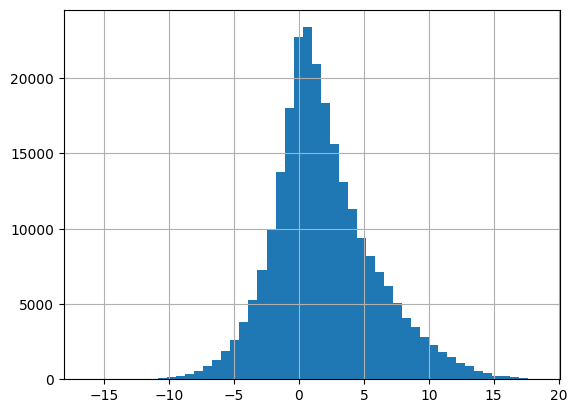

In [23]:
lr_res = lr_res.sort_values("interaction_stat", ascending=False)
lr_res['interaction_stat'].hist(bins=50)

In [31]:
lr_res.columns

Index(['ligand', 'receptor', 'source_genesymbol', 'target_genesymbol',
       'source', 'ligand_stat', 'ligand_pvalue', 'ligand_padj', 'ligand_expr',
       'ligand_props', 'target', 'receptor_stat', 'receptor_pvalue',
       'receptor_padj', 'receptor_expr', 'receptor_props', 'interaction_stat',
       'interaction_pvalue', 'interaction_padj', 'interaction_expr',
       'interaction_props', 'interaction'],
      dtype='object')

## 09. Top interactions Wald statistic

/home/kvalem/.conda/envs/liana_2024/lib/python3.11/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/kvalem/.conda/envs/liana_2024/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 1484 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


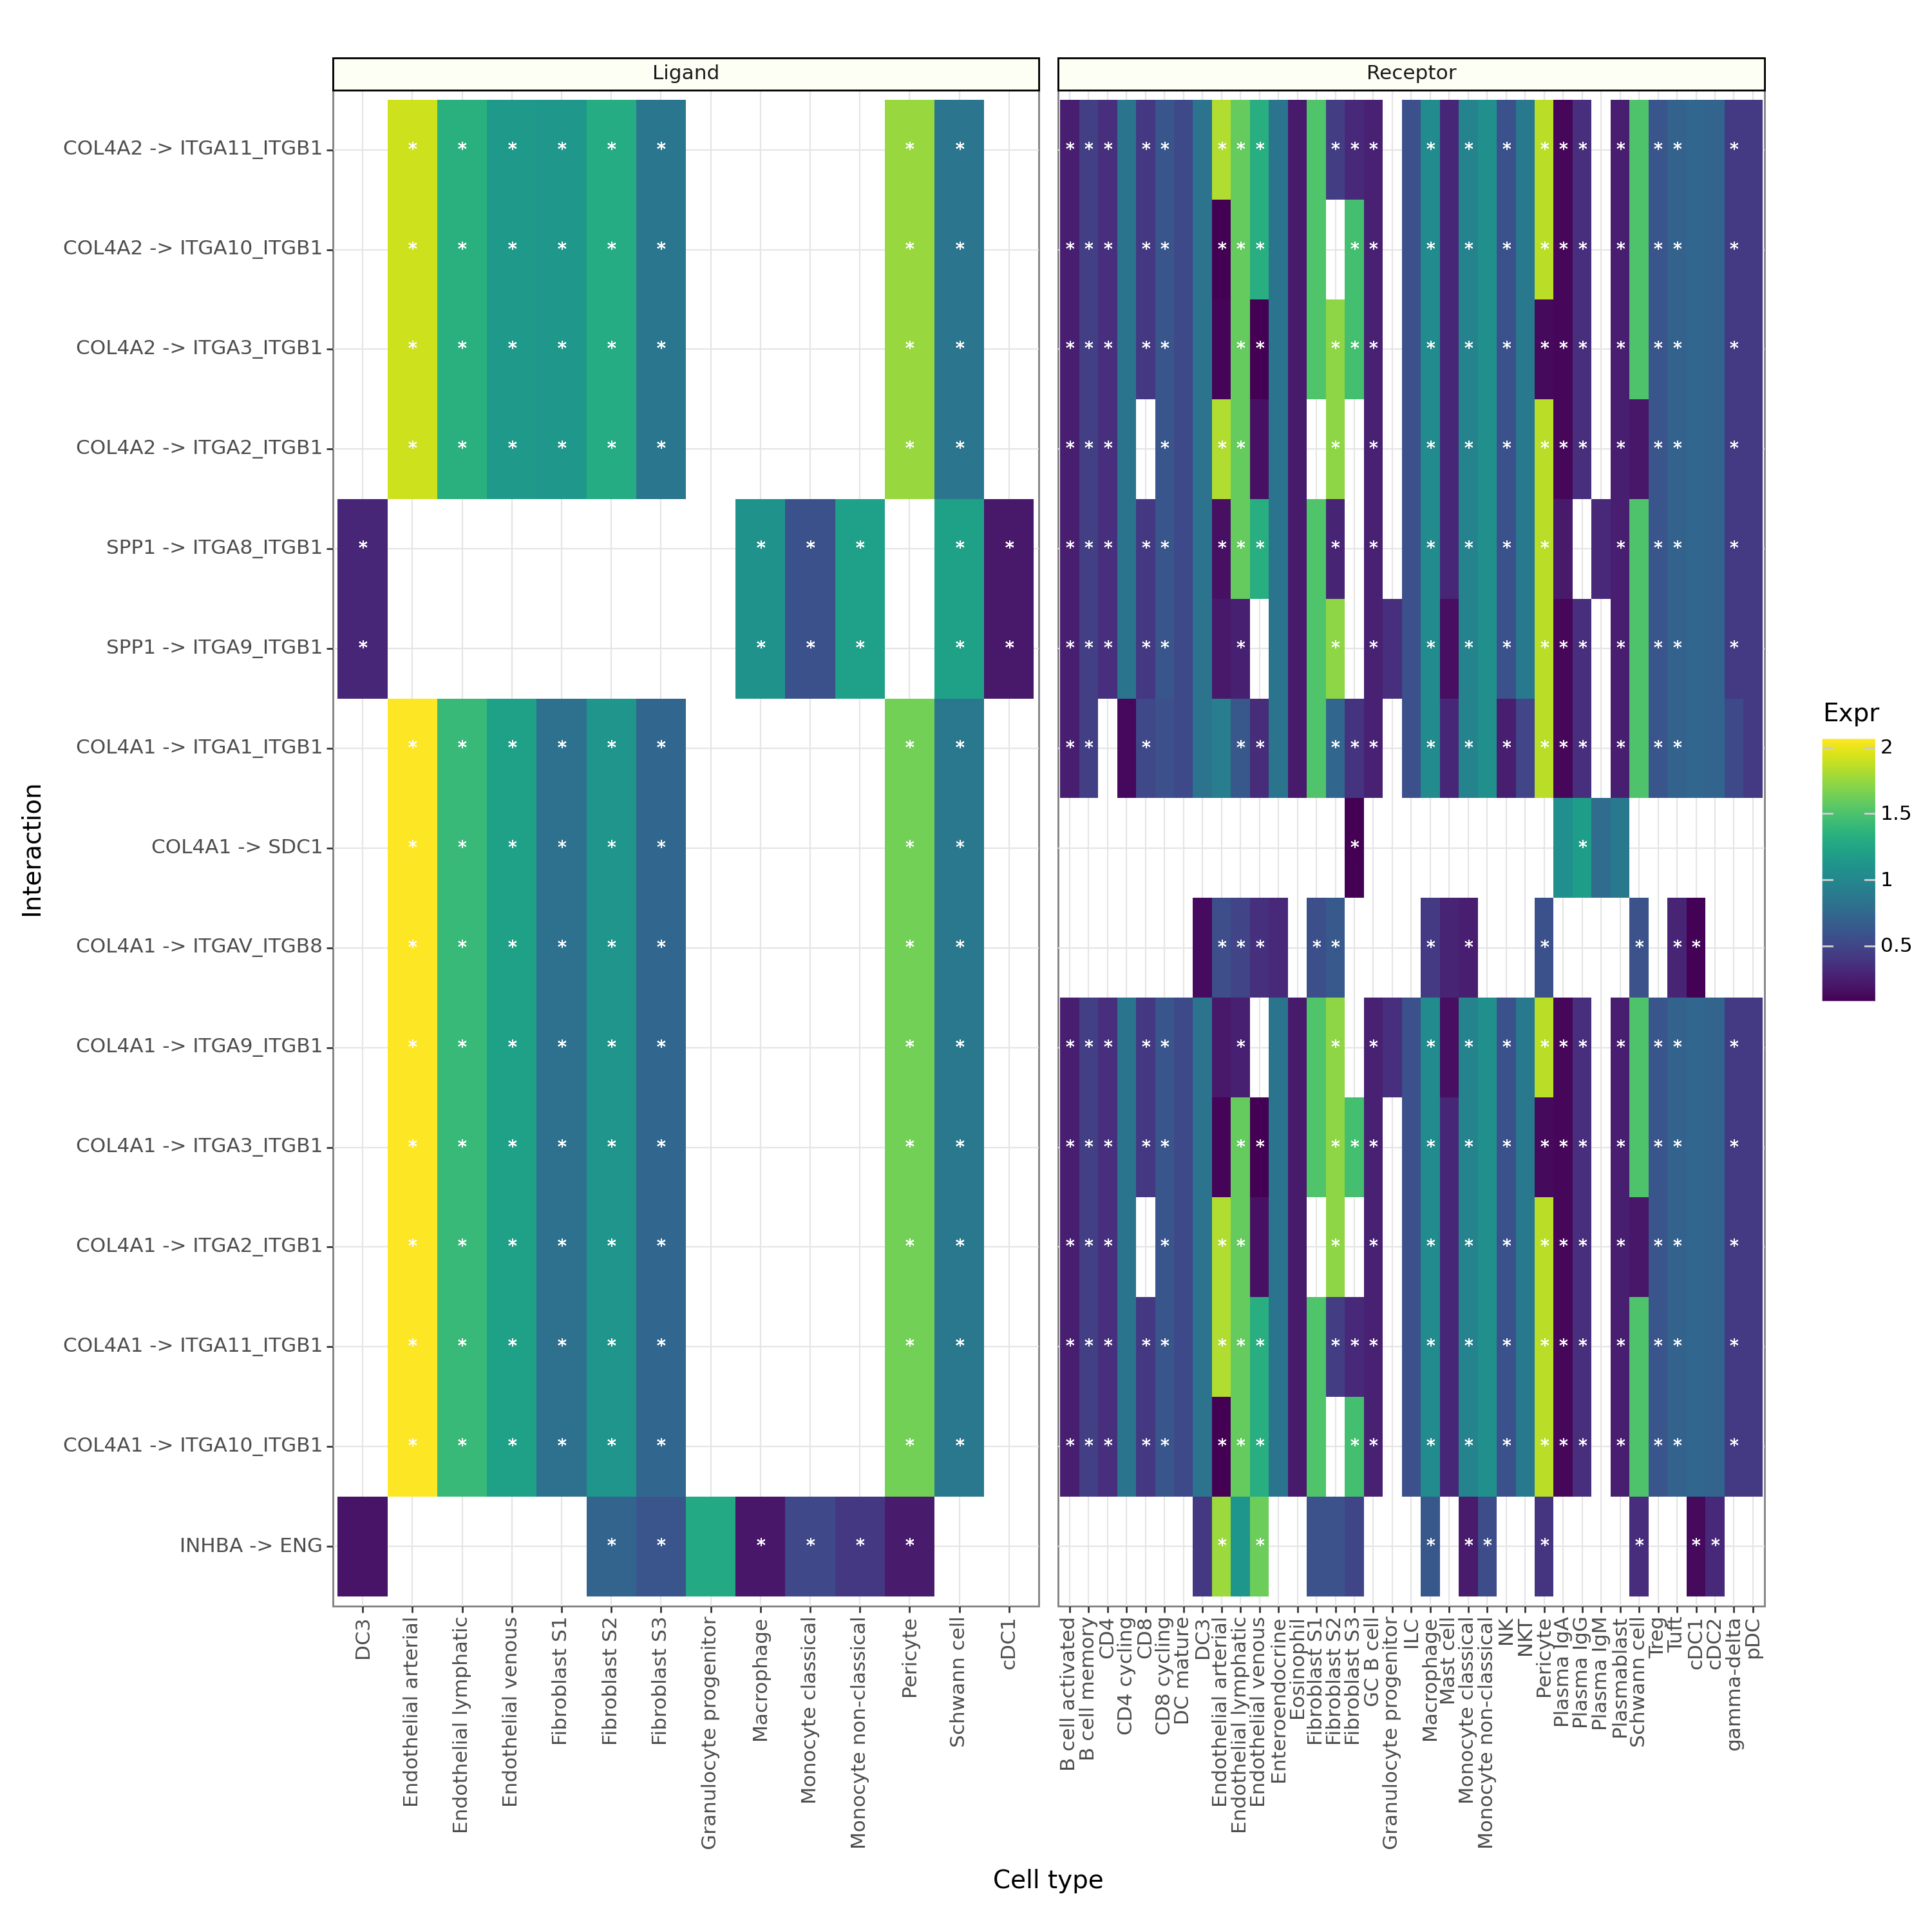

<Figure Size: (1500 x 1500)>

In [27]:
li.pl.tileplot(liana_res=lr_res,
               fill = 'expr',
               label='padj',
               label_fun = lambda x: '*' if x < 0.05 else np.nan,
               top_n=15,
               orderby = 'interaction_stat',
               orderby_ascending = False,
               orderby_absolute = False,
               source_title='Ligand',
               target_title='Receptor',
                figure_size = (15, 15),
               )

## 10. Ligand-Receptor Plot

In [29]:
plot = li.pl.dotplot(liana_res=lr_res,
                     colour='interaction_stat',
                     size='ligand_pvalue',
                     inverse_size=True,
                     orderby='interaction_stat',
                     orderby_ascending=False,
                     orderby_absolute=True,
                     top_n=10,
                     size_range=(0.5, 4)
                     )

# customize plot
#(
#    plot
#    + p9.theme_bw(base_size=14)
#    # fill cmap blue to red, with 0 the middle
#    + p9.scale_color_cmap('RdBu_r', midpoint=0, limits=(-10, 10))
#    # rotate x
#    + p9.theme(axis_text_x=p9.element_text(angle=90), figure_size=(11, 6))

#)

/home/kvalem/.conda/envs/liana_2024/lib/python3.11/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


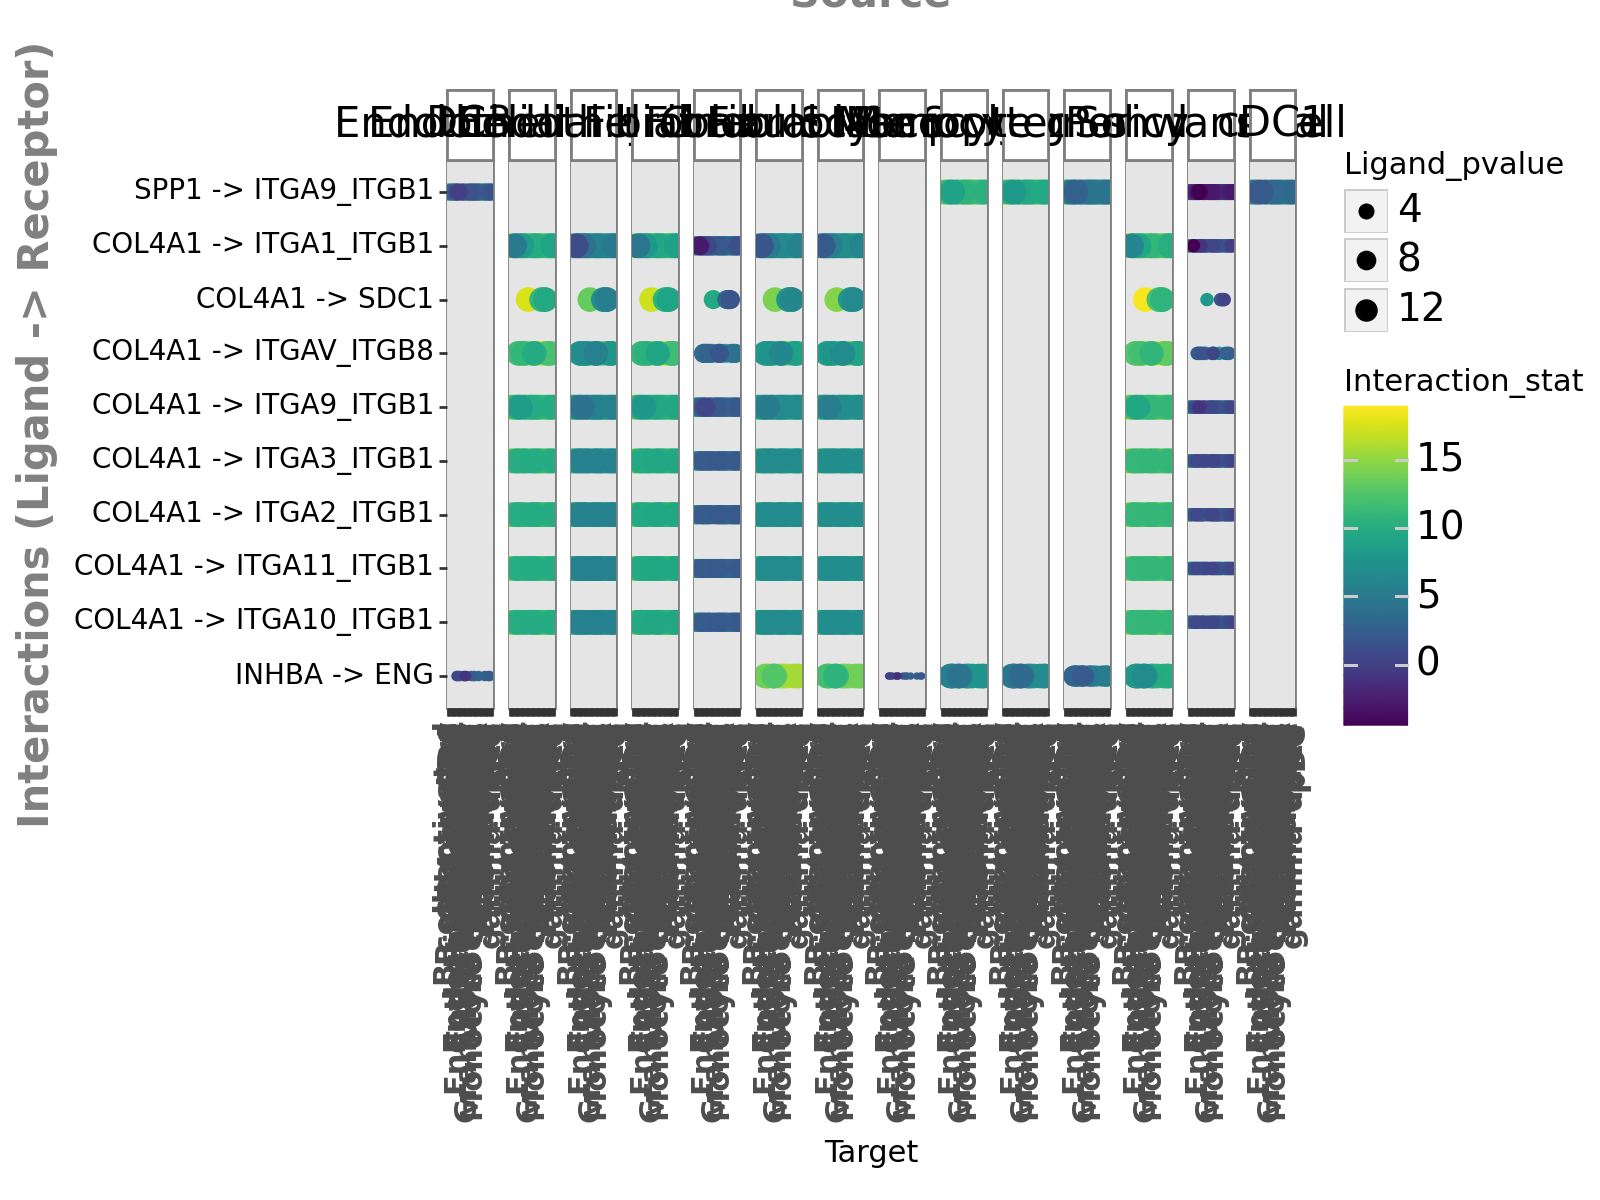

<Figure Size: (800 x 600)>

In [30]:
plot

In [32]:
!pip install matplotlib pandas numpy seaborn pycirclize

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 51.4 MB/s eta 0:00:00


In [37]:
# Parameters
top_n = 5  # Select the top N interactions
threshold_padj = 0.05  # Significance threshold

# Filter and sort DataFrame
lr_res_sorted = lr_res.sort_values(by="interaction_stat", ascending=False).head(top_n)

# Create a combined list of unique ligands and receptors for sectors
entities = pd.concat([lr_res_sorted["ligand"], lr_res_sorted["receptor"]]).unique()
sectors = {entity: {} for entity in entities}  # Define sectors as a dictionary

# Initialize Circos with sectors
circos = Circos(sectors=sectors)

# Add links for ligand-receptor pairs
for _, row in lr_res_sorted.iterrows():
    source = row["ligand"]
    target = row["receptor"]
    color = "blue" if row["padj"] < threshold_padj else "gray"
    circos.chords.add_chord(source=source, target=target, color=color, value=row["interaction_stat"])

# Add labels to sectors
circos.labels.add_labels(list(sectors.keys()))

# Plot the Circos diagram
fig = circos.plot_fig()
plt.title("Circos Plot of Ligand-Receptor Interactions")
plt.show()

TypeError: '>' not supported between instances of 'dict' and 'int'